In [50]:
# importing modules
import pandas as pd
import fastf1 as ff1
from fastf1.core import Laps
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

In [53]:
colormap = mpl.cm.plasma

In [45]:
# setting the monza session
session = ff1.get_session(2024, 'monza', "Q")
session.load()

NameError: name 'ff1' is not defined

In [46]:
# creating fastest laps
# mclaren boys
monza_fastest_norris = session.laps.pick_driver("NOR").pick_fastest()
monza_fastest_piastri = session.laps.pick_driver("PIA").pick_fastest()
# redbull boys
monza_fastest_verstappen = session.laps.pick_driver("VER").pick_fastest()
monza_fastest_perez = session.laps.pick_driver("PER").pick_fastest()
# ferrari boys
monza_fastest_leclerc = session.laps.pick_driver("LEC").pick_fastest()
monza_fastest_sainz = session.laps.pick_driver("SAI").pick_fastest()
# mercedes boys
monza_fastest_hamilton = session.laps.pick_driver("HAM").pick_fastest()
monza_fastest_russell = session.laps.pick_driver("RUS").pick_fastest()

In [47]:
# creating DFs
NOR = monza_fastest_norris.get_telemetry()
PIA = monza_fastest_piastri.get_telemetry()
VER = monza_fastest_verstappen.get_telemetry()
PER = monza_fastest_perez.get_telemetry()
LEC = monza_fastest_leclerc.get_telemetry()
SAI = monza_fastest_sainz.get_telemetry()
HAM = monza_fastest_hamilton.get_telemetry()
RUS = monza_fastest_russell.get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [48]:
NOR

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-09-01 14:17:00.153,0 days 02:09:16.234000,,368.051667,0 days 00:00:00,11282,319,8,99,False,0,interpolation,0.046344,0.000008,OnTrack,-1374,-692,1871
3,2024-09-01 14:17:00.230,0 days 02:09:16.311000,,368.051667,0 days 00:00:00.077000,11304,320,8,99,False,0,pos,6.913540,0.001204,OnTrack,-1369,-622,1872
4,2024-09-01 14:17:00.435,0 days 02:09:16.516000,,368.051667,0 days 00:00:00.282000,11348,321,8,99,False,0,car,25.188333,0.004388,OnTrack,-1357,-482,1872
5,2024-09-01 14:17:00.595,0 days 02:09:16.676000,81,368.051667,0 days 00:00:00.442000,11390,321,8,99,False,0,car,39.455000,0.006874,OnTrack,-1347,-368,1872
6,2024-09-01 14:17:00.670,0 days 02:09:16.751000,81,368.518333,0 days 00:00:00.517000,11393,322,8,99,False,0,pos,46.166219,0.008043,OnTrack,-1340,-284,1873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,2024-09-01 14:18:21.195,0 days 02:10:37.276000,,314.567500,0 days 00:01:21.042000,11118,316,8,100,False,0,car,5690.671667,0.991392,OnTrack,-1402,-1026,1869
625,2024-09-01 14:18:21.270,0 days 02:10:37.351000,,314.567500,0 days 00:01:21.117000,11178,316,8,100,False,0,pos,5697.270455,0.992542,OnTrack,-1399,-988,1870
626,2024-09-01 14:18:21.395,0 days 02:10:37.476000,,314.567500,0 days 00:01:21.242000,11238,317,8,100,False,0,car,5708.282778,0.994460,OnTrack,-1392,-905,1870
627,2024-09-01 14:18:21.570,0 days 02:10:37.651000,,314.567500,0 days 00:01:21.417000,11244,317,8,99,False,0,pos,5723.725478,0.997150,OnTrack,-1381,-763,1871


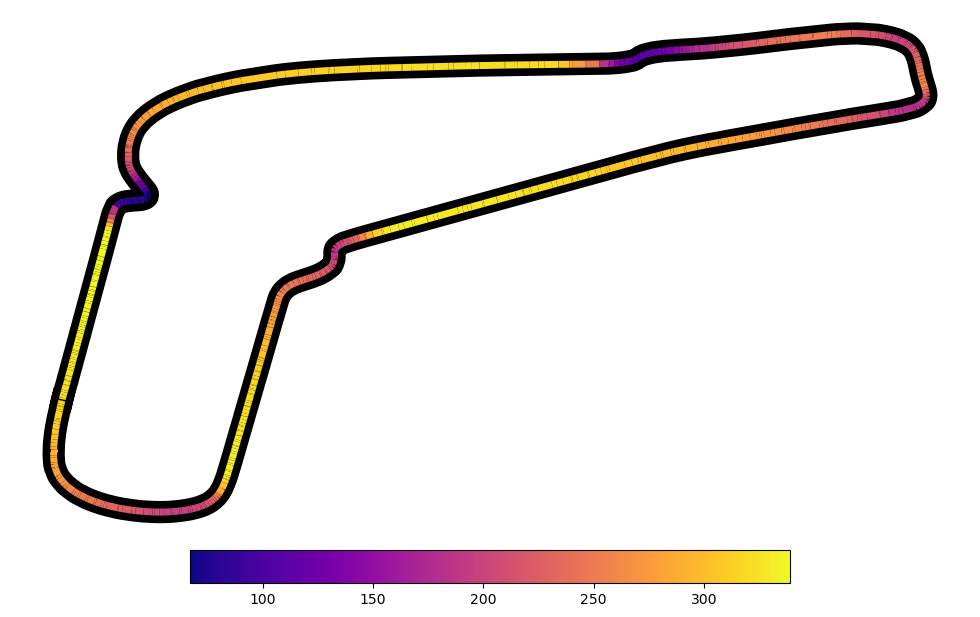

In [54]:
# lets plot for norris
x_nor = NOR['X']
y_nor = NOR['Y']
color_nor = NOR['Speed']

# selecting points
points_nor = np.array([x_nor, y_nor]).T.reshape(-1, 1, 2)
segments_nor = np.concatenate([points_nor[:-1], points_nor[1:]], axis=1)

# plot
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
# fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(x_nor, y_nor,
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color_nor.min(), color_nor.max())
lc = LineCollection(segments_nor, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color_nor)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color_nor.min(), vmax=color_nor.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()